In [1]:
import warnings
warnings.filterwarnings("ignore")

Create Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, json
from sklearn.model_selection import train_test_split
from sodapy import Socrata

In [3]:
first_df=pd.read_csv('Arrests_cleaned.csv')

In [4]:
client = Socrata("data.cityofchicago.org", None)
sec_df = pd.DataFrame()
for i in range(2014,2023):
    results = client.get("ijzp-q8t2", limit=80000, year=i)
    results_df = pd.DataFrame.from_records(results)
    sec_df = [sec_df, results_df[['case_number','ward','district']]]
    sec_df = pd.concat(sec_df)

In [5]:
merged_df_init = pd.merge(first_df, sec_df, on="case_number")
print(len(merged_df_init))
merged_df_init.head(1)

105297


,id,case_number,date_month,date_day,date_year,time,meridiem,race,charge_1_statute,charge_1_description,...,charge_4_statute,charge_4_description,charge_4_type,charge_4_class,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS,ward,district
0,30069116,JE252804,7,16,2021,9:36:00,PM,BLACK,720 ILCS 5.0/12-3.3-A,DOMESTIC BATTERY - AGGRAVATED,...,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3.3-A | | |,DOMESTIC BATTERY - AGGRAVATED | | |,F | | |,2 | | |,7,004


In [6]:
races = merged_df_init.loc[:, "race"].unique().tolist()
race_dummies = pd.get_dummies(merged_df_init, columns=["race"])
races = ["race_"+r for r in races]
race_dummies = race_dummies[races]
race_dummies

,race_BLACK,race_WHITE HISPANIC,race_BLACK HISPANIC,race_WHITE,race_ASIAN / PACIFIC ISLANDER,race_UNKNOWN / REFUSED,race_AMER INDIAN / ALASKAN NATIVE
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
105292,0,0,1,0,0,0,0
105293,1,0,0,0,0,0,0
105294,1,0,0,0,0,0,0
105295,0,1,0,0,0,0,0


In [7]:
merged_df = merged_df_init[['ward','district','date_day','date_year','charge_1_type']]
# merged_df['ward'] = pd.to_numeric(merged_df['ward'])
# merged_df['district'] = pd.to_numeric(merged_df['district'])

merged_df = pd.concat([merged_df, race_dummies], axis=1).dropna()

In [8]:
merged_df

,ward,district,date_day,date_year,charge_1_type,race_BLACK,race_WHITE HISPANIC,race_BLACK HISPANIC,race_WHITE,race_ASIAN / PACIFIC ISLANDER,race_UNKNOWN / REFUSED,race_AMER INDIAN / ALASKAN NATIVE
0,7,004,16,2021,F,1,0,0,0,0,0,0
1,42,001,20,2021,M,1,0,0,0,0,0,0
2,17,007,2,2014,M,1,0,0,0,0,0,0
3,14,008,15,2022,M,0,1,0,0,0,0,0
4,15,008,18,2014,M,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
105292,22,010,7,2022,F,0,0,1,0,0,0,0
105293,34,022,7,2022,M,1,0,0,0,0,0,0
105294,9,005,7,2022,F,1,0,0,0,0,0,0
105295,7,003,7,2022,F,0,1,0,0,0,0,0


In [9]:
x = merged_df[['race_WHITE HISPANIC','race_BLACK','race_BLACK HISPANIC','race_WHITE','race_ASIAN / PACIFIC ISLANDER','race_AMER INDIAN / ALASKAN NATIVE', \
    'race_UNKNOWN / REFUSED','ward','district','date_day','date_year']]
y = merged_df[['charge_1_type']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [10]:
merged_df.to_csv('final_dataset.csv')

EDA

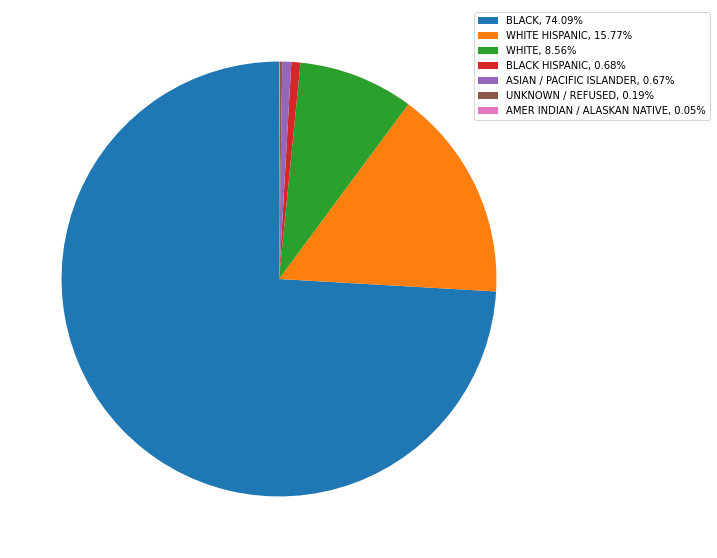

In [11]:
import seaborn as sns

#Pie chart for number of arrests per race

vc=merged_df_init['race'].value_counts()
labels = list(dict(vc).keys())
total=sum(list(dict(vc).values()))
sizes = list(dict(vc).values())/total*100
labels = [f'{l}, {s:0.2f}%' for l, s in zip(labels, sizes)]
plt.figure(figsize = (15,10))
pie = plt.pie(sizes, startangle=90)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

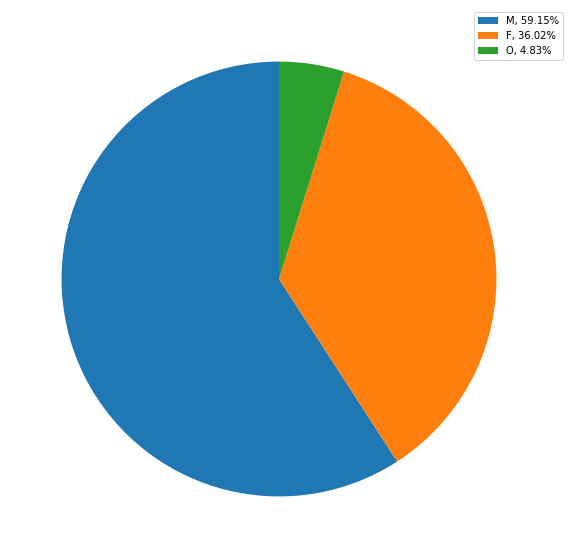

In [12]:
#Pie chart of charge 1 type
vc=merged_df_init['charge_1_type'].value_counts()
labels = list(dict(vc).keys())[:3]
total=sum(list(dict(vc).values()))
sizes = list(dict(vc).values())[:3]/total*100
labels = [f'{l}, {s:0.2f}%' for l, s in zip(labels, sizes)]
plt.figure(figsize = (15,10))
pie = plt.pie(sizes, startangle=90)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

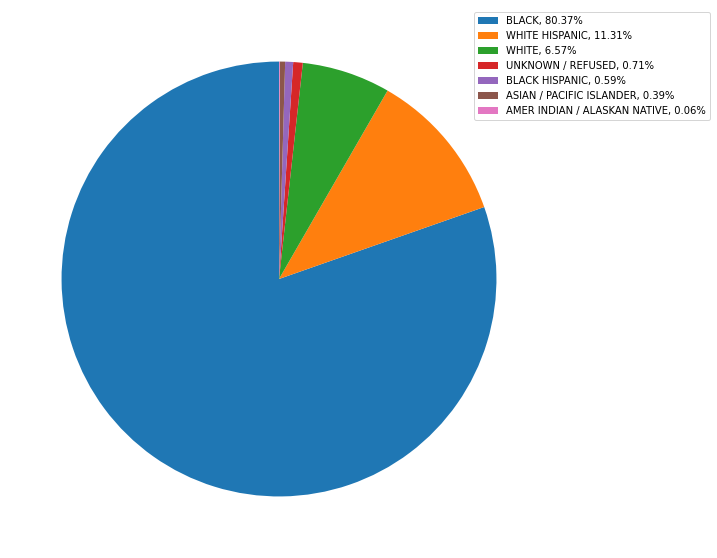

In [13]:
#Chart for number of arrests per charge type per race

df_O=merged_df_init.loc[merged_df_init['charge_1_type']=='O']
vc=df_O['race'].value_counts()
labels = list(dict(vc).keys())
total=sum(list(dict(vc).values()))
sizes = list(dict(vc).values())/total*100
labels = [f'{l}, {s:0.2f}%' for l, s in zip(labels, sizes)]
plt.figure(figsize = (15,10))
pie = plt.pie(sizes, startangle=90)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

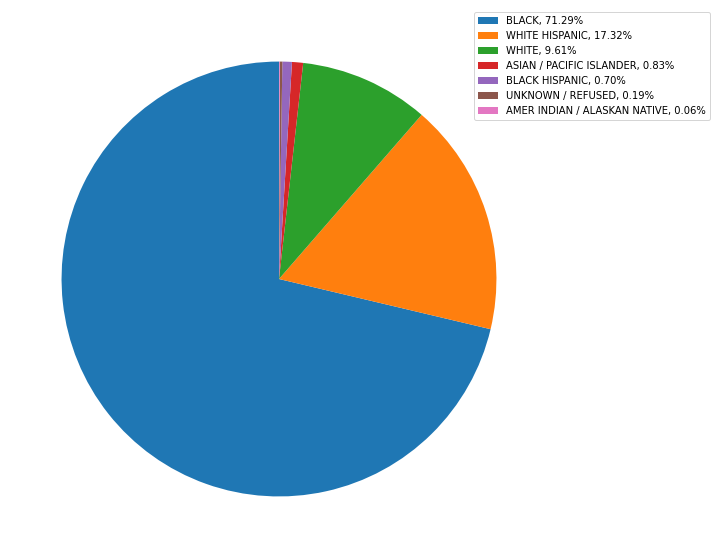

In [14]:
df_M=merged_df_init.loc[merged_df_init['charge_1_type']=='M']
vc=df_M['race'].value_counts()
labels = list(dict(vc).keys())
total=sum(list(dict(vc).values()))
sizes = list(dict(vc).values())/total*100
labels = [f'{l}, {s:0.2f}%' for l, s in zip(labels, sizes)]
plt.figure(figsize = (15,10))
pie = plt.pie(sizes, startangle=90)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

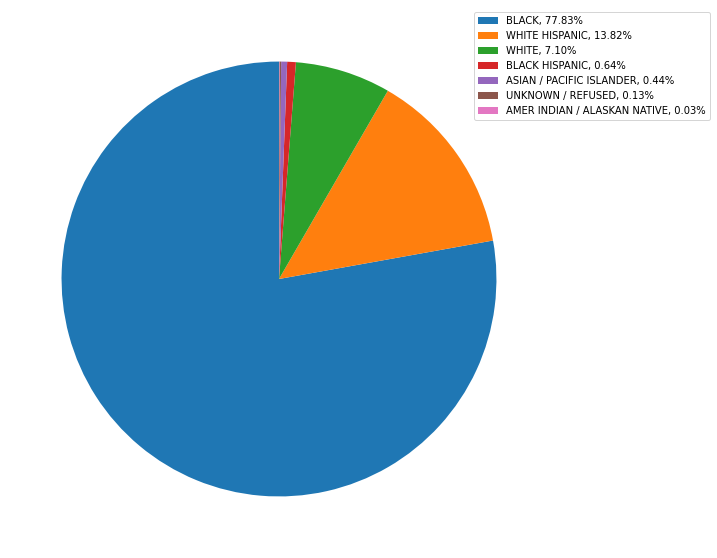

In [15]:
df_M=merged_df_init.loc[merged_df_init['charge_1_type']=='F']
vc=df_M['race'].value_counts()
labels = list(dict(vc).keys())
total=sum(list(dict(vc).values()))
sizes = list(dict(vc).values())/total*100
labels = [f'{l}, {s:0.2f}%' for l, s in zip(labels, sizes)]
plt.figure(figsize = (15,10))
pie = plt.pie(sizes, startangle=90)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

In [16]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

<AxesSubplot: xlabel='date_year', ylabel='count'>

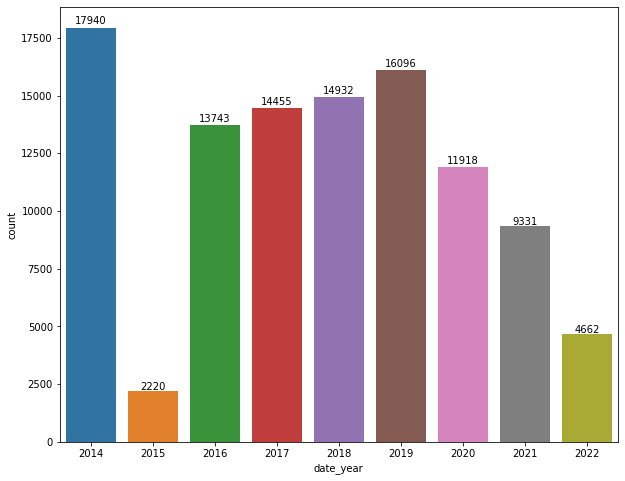

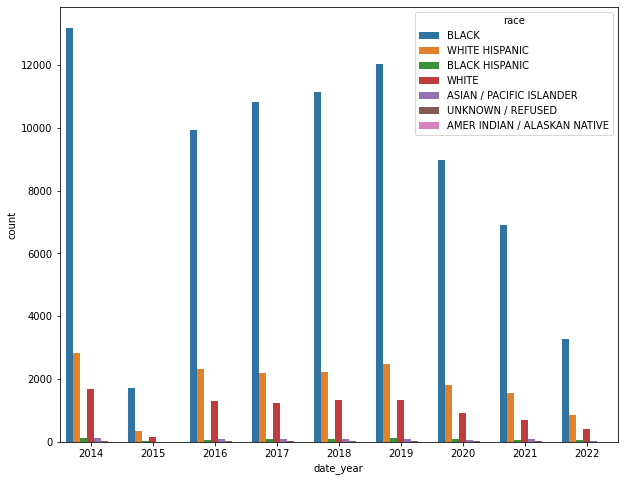

In [17]:
#Chart for number of arrests per year type per race
plt.figure(figsize=(10,8))
p=sns.countplot(x='date_year', data=merged_df_init)
show_values(p)
plt.figure(figsize=(10,8))
sns.countplot(x='date_year', hue='race', data=merged_df_init)

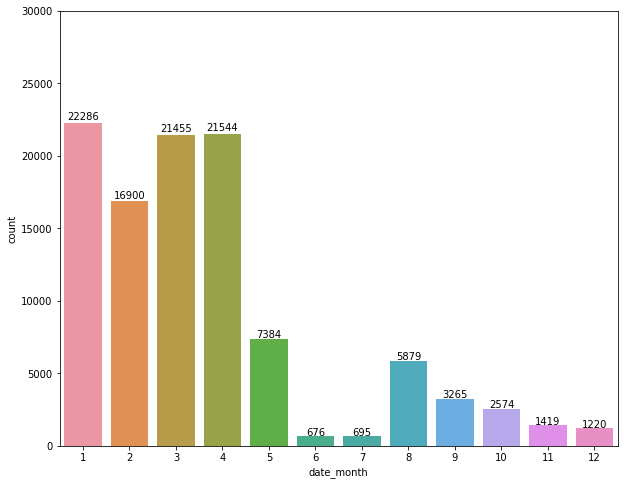

In [18]:
#Total number of arrests per month (1-12)
plt.figure(figsize=(10,8))
p=sns.countplot(x='date_month',data=merged_df_init)
plt.ylim([0, 30000])
show_values(p)

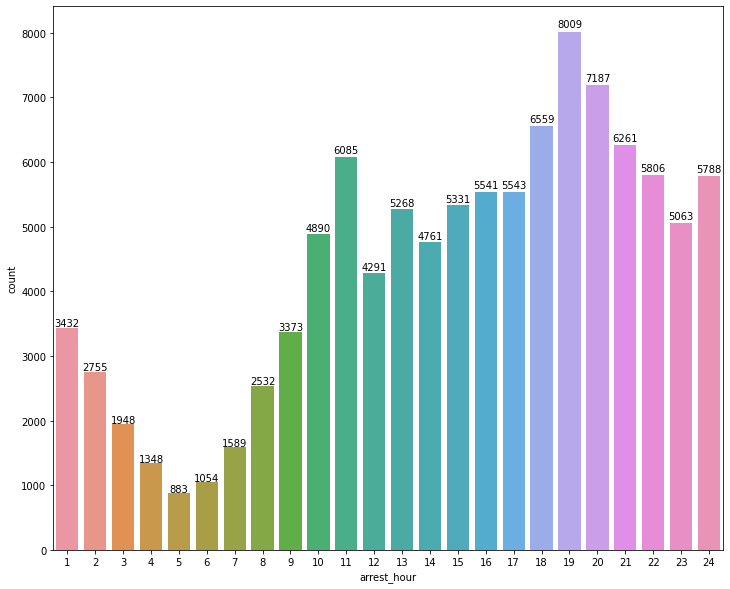

In [19]:
#Total number of arrests per time of day (12am - 11:59pm)
merged_df_init["arrest_hour"]=merged_df_init.apply(lambda x: pd.to_numeric(x['time'].split(':')[0]) if x['meridiem']=='AM' else pd.to_numeric(x['time'].split(':')[0])+12,axis=1)
plt.figure(figsize=(12,10))
p=sns.countplot(x='arrest_hour', data=merged_df_init)
show_values(p)

Global Variables

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

scalers = [MinMaxScaler(), StandardScaler(), PCA()]

KNN

In [21]:
from  sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(3, 10, 2)],'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':[i for i in range(20, 40, 5)]}
clf_knn = GridSearchCV(knn, params, cv=5)
clf_knn.fit(x_train,y_train)
print(clf_knn.best_estimator_)

KeyboardInterrupt: ignored

In [ ]:
y_pred = clf_knn.predict(x_test)
print("Multi-class F1 score: ", f1_score(y_test, y_pred, average='macro'))

In [ ]:
print("Best score:", clf_knn.best_score_)
print("CV score:", clf_knn.cv_results_['mean_test_score'].mean())

In [ ]:
for index, scaling in enumerate(scalers):
    pipe = make_pipeline(scaling, clf_knn.best_estimator_)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(scalers[index], "score = ", accuracy_score(y_pred, y_test))

In [ ]:
clf_knn.best_estimator_.fit(x_train,y_train)
y_pred = clf_knn.best_estimator_.predict(x_test)
print("No scaling score = ", accuracy_score(y_pred, y_test))

Neural Networks

In [ ]:
from statistics import mean 

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
net_classifier = MLPClassifier()
net_classifier.fit(x_train,y_train['charge_1_type'].tolist())
classifier_preds = net_classifier.predict(x_test)
score = net_classifier.score(x_test,y_test)
print(score)

In [ ]:
scores = []
for scaling in scalers:
    pipe = make_pipeline(scaling, net_classifier)
    pipe.fit(x_train,y_train['charge_1_type'].tolist())
    scores.append(pipe.score(x_test,y_test))

print("MinMaxScore =",scores[0])
print("StandardScaler =",scores[1])
print("PCA =",scores[2])

In [ ]:
parameters = {
    # 'solver': ['lbfgs', 'sgd', 'adam'],
    # 'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    # 'alpha' : [0.001, 0.01,0.0001,0.002,0.003],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.001,0.002,0.0011,0.0009],
    'random_state':[0,100,200,300,400],
}

search = GridSearchCV(net_classifier,parameters)
search.fit(x_train,y_train['charge_1_type'].tolist())

best = search.best_estimator_
best_score = best.score(x_test,y_test)
print("Best score:", best_score)
print("CV score:", search.cv_results_['mean_test_score'].mean())
print("Best estimator:", best)

In [ ]:
scores = []
for scaling in scalers:
    pipe = make_pipeline(scaling, best)
    pipe.fit(x_train,y_train['charge_1_type'].tolist())
    scores.append(pipe.score(x_test,y_test))

print("MinMaxScore =",scores[0])
print("StandardScaler =",scores[1])
print("PCA =",scores[2])

In [ ]:
y_pred = search.predict(x_test)
print("Multi-class F1 score: ", f1_score(y_test, y_pred, average='macro'))

Random Forest

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
clf_m = RandomForestClassifier(n_estimators = 100,random_state=0)
clf_m.fit(x_train, y_train)
scores_RF = cross_val_score(clf_m, x_train,y_train, cv=5)

In [26]:
parameters = {'max_depth':[i for i in range(6,17,2)],'min_samples_leaf':[i for i in range(9, 15)]}
clf_mCV = GridSearchCV(clf_m, parameters, scoring='accuracy', cv=5)
clf_mCV.fit(x_train,y_train)
print("Best estimator:", clf_mCV.best_estimator_)

KeyboardInterrupt: ignored

In [ ]:
parameters = {'max_features':[i for i in range(4, 9)],'min_samples_split':[i for i in range(33,39)]}
clf_mCV = GridSearchCV(clf_mCV.best_estimator_, parameters,cv=5)
clf_mCV.fit(x_train,y_train)

print("Best Estimator:", clf_mCV.best_estimator_)
print("Best score:", clf_mCV.best_score_)
print("CV score:", clf_mCV.cv_results_['mean_test_score'].mean())

In [ ]:
# performing predictions on the test dataset
y_pred_m = clf_mCV.best_estimator_.predict(x_test)

# using metrics module for accuracy calculation
print("Accuracy: ", accuracy_score(y_test, y_pred_m))

In [ ]:
for index, scaling in enumerate(scalers):
    pipe = make_pipeline(scaling, clf_mCV.best_estimator_)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(scalers[index], "score = ", accuracy_score(y_pred, y_test))

In [ ]:
print("Multi-class F1 score: ", f1_score(y_test, y_pred_m, average='macro'))

Gradient Boosting

In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [29]:
merged_df = merged_df.infer_objects()

x = merged_df[['race_WHITE HISPANIC','race_BLACK','race_BLACK HISPANIC','race_WHITE','race_ASIAN / PACIFIC ISLANDER','race_AMER INDIAN / ALASKAN NATIVE', \
    'race_UNKNOWN / REFUSED','ward','district','date_day','date_year']]

x = x.astype({'district':'int', 'ward':'int'})

m_charge_types = merged_df.loc[:, "charge_1_type"].replace('A', 'M')
m_charge_types = m_charge_types.replace('R', 'O')
m_charge_types = m_charge_types.replace('V', 'O')
multi_class_types = pd.factorize(m_charge_types)
multi_class_types = multi_class_types[0]

x_train, x_test, y_train, y_test = train_test_split(x, multi_class_types, test_size=0.2, random_state=2)

In [30]:
# training
xgb_clf_m = XGBClassifier()
xgb_clf_m.fit(x_train, y_train)

# testing
score_m = xgb_clf_m.score(x_test, y_test)
print("accuracy score: ", score_m)

accuracy score:  0.6382544280355192


In [31]:
for index, scaling in enumerate(scalers):
    pipe = make_pipeline(scaling, XGBClassifier())
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(scalers[index], "score = ", accuracy_score(y_pred, y_test))

MinMaxScaler() score =  0.6382544280355192
StandardScaler() score =  0.6382544280355192
PCA() score =  0.6207322285008785


In [ ]:
xgb_params = {"min_child_weight": [i for i in range(1,5)], "max_depth": [i for i in range(3,10)]}
xgb_clf = XGBClassifier()
xgb_clf_cv = GridSearchCV(xgb_clf, scoring='accuracy', cv=5, param_grid=xgb_params)
xgb_clf_cv.fit(x_train, y_train)
print("best parameters: ", xgb_clf_cv.best_params_)
print("best score:", xgb_clf_cv.best_score_)
print("CV score:", xgb_clf_cv.cv_results_['mean_test_score'].mean())
print("Best Estimator:", clf_mCV.best_estimator_)
print("Accuracy:", xgb_clf_cv.score(x_test, y_test))

In [ ]:
# training
light_clf = HistGradientBoostingClassifier()
light_clf.fit(x_train, y_train)

# testing
score_light = light_clf.score(x_test, y_test)
print("accuracy score: ", score_light)

In [ ]:
y_pred = light_clf.predict(x_test)
print("Multi-class F1 score: ", f1_score(y_test, y_pred, average='macro'))

In [ ]:
for index, scaling in enumerate(scalers):
    pipe = make_pipeline(scaling, HistGradientBoostingClassifier())
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(scalers[index], "score = ", accuracy_score(y_pred, y_test))

In [ ]:
hist_params = {"max_iter": [100, 150, 200], "max_leaf_nodes": [31, None], "max_depth": [9, None], "l2_regularization": [0, 0.001, 0.1]}
hist_clf = HistGradientBoostingClassifier()
hist_clf_cv = GridSearchCV(hist_clf, scoring='accuracy', cv=5, param_grid=hist_params)
hist_clf_cv.fit(x_train, y_train)
print("best parameters: ", hist_clf_cv.best_params_)
print("best score:", hist_clf_cv.best_score_)
print("CV score:", hist_clf_cv.cv_results_['mean_test_score'].mean())
print(hist_clf_cv.score(x_test, y_test))

In [ ]:
y_pred = hist_clf_cv.predict(x_test)
print("Multi-class F1 score: ", f1_score(y_test, y_pred, average='macro'))

In [ ]:
# Plot
dims = list(range(1, 11))
acc_scores = []
for dim in dims:
    # PCA
    pca_project = PCA(n_components=dim)
    trans_s_data = pca_project.fit_transform(x_train)

    # CV
    hist_params = {'l2_regularization': [0.001], 'max_depth': [None], 'max_iter': [100], 'max_leaf_nodes': [31]}
    hist_clf = HistGradientBoostingClassifier()
    hist_clf_cv = GridSearchCV(hist_clf, scoring='accuracy', cv=5, param_grid=hist_params)
    hist_clf_cv.fit(trans_s_data, y_train)
    acc_scores.append(hist_clf_cv.best_score_)
    print("dim = ", dim, " accuracy score: ", hist_clf_cv.best_score_)

In [ ]:
plt.plot(dims, acc_scores)
plt.axvline(x = 4, color = 'purple', label = 'axvline - full height', linestyle=":")
plt.axvline(x = 12, color = 'purple', label = 'axvline - full height', linestyle=":")
plt.xlabel("dimension")
plt.ylabel("accuracy score")
plt.title("Explore Reduced Dimensions by Knee Method")
plt.show()

Ensemble Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier, HistGradientBoostingClassifier, StackingClassifier, ExtraTreesClassifier

In [ ]:
merged_df = pd.merge(first_df, sec_df, on="case_number")
races = merged_df.loc[:, "race"].unique().tolist()
race_dummies = pd.get_dummies(merged_df, columns=["race"])
races = ["race_"+r for r in races]
race_dummies = race_dummies[races]
merged_df = merged_df[['ward','district','date_day','date_year','charge_1_type']]
merged_df = pd.concat([merged_df, race_dummies], axis=1).dropna()
x = merged_df[['race_WHITE HISPANIC','race_BLACK','race_BLACK HISPANIC','race_WHITE','race_ASIAN / PACIFIC ISLANDER','race_AMER INDIAN / ALASKAN NATIVE', \
    'race_UNKNOWN / REFUSED','ward','district','date_day','date_year']]
y = merged_df[['charge_1_type']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
y_bool_train = [i == "M" for i in y_train['charge_1_type']]
y_bool_test = [i == "M" for i in y_test['charge_1_type']]

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy')
decision_tree_model.fit(x_train, y_bool_train)
y_pred = decision_tree_model.predict(x_test)
cv_results = cross_validate(decision_tree_model, x_train, y_bool_train)
cv_results

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy')
params = {'max_depth': [i for i in range(1,21)], 'max_leaf_nodes': [i for i in range(20,150,5)]}
clf = GridSearchCV(decision_tree_model, params, scoring='accuracy', cv=5)
clf.fit(x_train, y_bool_train)
print("best estimator:", clf.best_estimator_)
print("best score:", clf.best_score_)
print("CV score:", clf.cv_results_['mean_test_score'].mean())

In [ ]:
decision_tree_model = clf.best_estimator_
decision_tree_model.fit(x_train, y_bool_train)
y_pred = decision_tree_model.predict(x_train)
cv_results = cross_validate(decision_tree_model, x_train, y_bool_train)
score = np.mean(cv_results['test_score'])
print("cv result:", score)

In [ ]:
bg_clf = BaggingClassifier(base_estimator = decision_tree_model)
bg_clf.fit(x_train, y_bool_train)
y_pred = bg_clf.predict(x_test)
accuracy_score(y_pred, y_bool_test)

In [ ]:
clf = []
for i in range(10):
    clf.append(bg_clf)
eclf1 = VotingClassifier(estimators=[('clf1', clf[0]), 
                                     ('clf2', clf[1]), 
                                     ('clf3', clf[2]), 
                                     ('clf4', clf[3]), 
                                     ('clf5', clf[4]), 
                                     ('clf6', clf[5]), 
                                     ('clf7', clf[6]), 
                                     ('clf8', clf[7]), 
                                     ('clf9', clf[8]), 
                                     ('clf10', clf[9])], voting='hard')
eclf1 = eclf1.fit(x_train, y_bool_train)
cv_results = cross_validate(eclf1, x_train, y_bool_train)
y_pred = eclf1.predict(x_test)
accuracy_score(y_pred, y_bool_test)

In [ ]:
print("Multi-class F1 score: ", f1_score(y_test, y_pred, average='macro'))

In [ ]:
for index, scaling in enumerate(scalers):
    pipe = make_pipeline(scaling, bg_clf)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(scalers[index], "score = ", accuracy_score(y_pred, y_test))

In [ ]:
aclf = AdaBoostClassifier()
aclf.fit(x_train,y_bool_train)
y_pred = aclf.predict(x_test)
accuracy_score(y_pred, y_bool_test)

In [ ]:
rclf = RandomForestClassifier()
rclf.fit(x_train,y_bool_train)
y_pred = rclf.predict(x_test)
accuracy_score(y_pred, y_bool_test)

In [ ]:
eclf = ExtraTreesClassifier()
eclf.fit(x_train,y_bool_train)
y_pred = eclf.predict(x_test)
accuracy_score(y_pred, y_bool_test)

In [ ]:
hclf = HistGradientBoostingClassifier()
hclf.fit(x_train,y_bool_train)
y_pred = hclf.predict(x_test)
accuracy_score(y_pred, y_bool_test)

In [ ]:
estimators = [('dt', decision_tree_model),('rf',RandomForestClassifier())]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(x_train,y_bool_train)
y_pred = sclf.predict(x_test)
accuracy_score(y_pred, y_bool_test)

Visualizations

In [ ]:
pre_scale = [0.6074, 0.5903, 0.6445, 0.6419, 0.6431, 0.6589]
post_scale = [0.608, 0.6367, 0.6445, 0.6419, 0.6443, 0.6446]
methods = ['KNN','Neural Nets','Random Forest','Gradient Boosting - XGB','Gradient Boosting - Hist','Ensemble - Bagging']
x = np.arange(len(methods))
width = 0.35
fig, ax = plt.subplots(figsize = (10, 5))
rects1 = ax.bar(x - width/2, pre_scale, width, label='before scaling')
rects2 = ax.bar(x + width/2, post_scale, width, label='after scaling')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for all the models')
ax.set_xticks(x, methods)
ax.set_ylim([0.5, 0.7])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()
